# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [62]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [63]:
dataset = pd.read_csv("Ionosphere_Data.csv")

dataset.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [64]:
dataset.shape

(351, 35)

In [65]:
train_size = int(dataset.shape[0] * 0.6)

In [66]:
y = dataset["label"]
x = dataset.drop(["label"], axis=1)
input_shape = x.iloc[0, :].shape
print(input_shape)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

(34,)


In [67]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.fit_transform(y_test)


In [68]:
def build_model():
    model = Sequential()
    model.add(Dense(34, input_shape=input_shape, activation="relu"))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(metrics=["accuracy"], loss="binary_crossentropy", optimizer="rmsprop")
    return model

In [69]:
model = build_model()

history = model.fit(x_train, y_train, epochs=80, batch_size=16)

Epoch 1/80
14/14 [==============================] - 1s 5ms/step - loss: 0.6555 - accuracy: 0.6059
Epoch 2/80
14/14 [==============================] - 0s 7ms/step - loss: 0.5698 - accuracy: 0.8515
Epoch 3/80
14/14 [==============================] - 0s 7ms/step - loss: 0.5301 - accuracy: 0.8584
Epoch 4/80
14/14 [==============================] - 0s 10ms/step - loss: 0.4823 - accuracy: 0.8933
Epoch 5/80
14/14 [==============================] - 0s 12ms/step - loss: 0.4457 - accuracy: 0.8779
Epoch 6/80
14/14 [==============================] - 0s 7ms/step - loss: 0.4059 - accuracy: 0.8894
Epoch 7/80
14/14 [==============================] - 0s 6ms/step - loss: 0.3900 - accuracy: 0.8815
Epoch 8/80
14/14 [==============================] - 0s 9ms/step - loss: 0.3512 - accuracy: 0.8833
Epoch 9/80
14/14 [==============================] - 0s 8ms/step - loss: 0.3263 - accuracy: 0.8905
Epoch 10/80
14/14 [==============================] - 0s 8ms/step - loss: 0.3036 - accuracy: 0.8953
Epoch 11/80
14/14

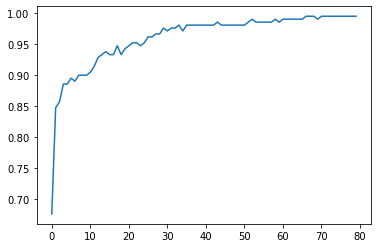

In [70]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
plt.plot(range(80), accuracy)
plt.show()

In [71]:
prediction_score = model.evaluate(x_test, y_test, batch_size=16)
print("Accuracy: {:.0%}, Loss: {:.0%}".format(prediction_score[1], prediction_score[0]))

9/9 [==============================] - 1s 8ms/step - loss: 0.0959 - accuracy: 0.9716
Accuracy: 97%, Loss: 10%


In [72]:
data_to_predict = x_test.to_numpy()[0]
data_to_predict = data_to_predict.reshape((-1, 34))

In [73]:
prediction = model.predict([np.array(data_to_predict)])

array([[1.0923631e-10]], dtype=float32)